In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import random
import seaborn as sns

%matplotlib inline
from IPython.display import HTML


In [4]:
data = pd.read_csv('/content/drive/MyDrive/動作分析法/RunningDigitize/running_digitizeddata.csv')
data

FileNotFoundError: [Errno 2] File /content/drive/MyDrive/動作分析法/RunningDigitize/running_digitizeddata.csv does not exist: '/content/drive/MyDrive/動作分析法/RunningDigitize/running_digitizeddata.csv'

In [6]:
data.columns
print(data.columns)
print(len(data.columns))

Index(['time', '左大転子:X', '左大転子:Y', '右大転子:X', '右大転子:Y', '右膝:X', '右膝:Y', '右踵:X',
       '右踵:Y', '右爪先:X', '右爪先:Y', '左膝:X', '左膝:Y', '左踵:X', '左踵:Y', '左肩:X',
       '左肩:Y', '左肘:X', '左肘:Y', '左手首:X', '左手首:Y', '左手先:X', '左手先:Y', '胸骨:X',
       '胸骨:Y', '頭部:X', '頭部:Y', '右肩:X', '右肩:Y', '右肘:X', '右肘:Y', '右手首:X',
       '右手首:Y', '右手先:X', '右手先:Y', '左爪先:X', '左爪先:Y', '胴部:X', '胴部:Y'],
      dtype='object')
39


## 変数の意味

- 大転子 -> daitensi
- 膝 -> knee
- 踵 -> heel
- つま先 -> toe
- 肩 -> shoulder
- 肘 -> elbow
- 手首 -> wrist
- 胸骨 -> chest
- 頭部 -> head
- 手先 -> hand
- 胴部 -> body



## とりあえず０秒で人を書いてみる







In [ ]:
#０秒時のデータ
zero_sec = data.iloc[:1,:]

In [9]:
z_daitensi_l = np.array( [ data['左大転子:X'][0] , data['左大転子:Y'][0] ] )
z_daitensi_r = np.array( [ data['右大転子:X'][0] , data['右大転子:Y'][0] ] )
z_knee_r = np.array( [ data['右膝:X'][0] , data['右膝:Y'][0] ] )
z_knee_l = np.array( [ data['左膝:X'][0] , data['左膝:Y'][0] ] )
z_heel_r = np.array( [ data['右踵:X'][0] , data['右踵:Y'][0] ] )
z_heel_l = np.array( [ data['左踵:X'][0] , data['左踵:Y'][0] ] )
z_toe_r = np.array( [ data['右爪先:X'][0] , data['右爪先:Y'][0] ] )
z_toe_l = np.array( [ data['左爪先:X'][0] , data['左爪先:Y'][0] ] )
z_shoulder_r = np.array( [ data['右肩:X'][0] , data['右肩:Y'][0] ] )
z_shoulder_l = np.array( [ data['左肩:X'][0] , data['左肩:Y'][0] ] )
z_elbow_r = np.array( [ data['右肘:X'][0] , data['右肘:Y'][0] ] )
z_elbow_l = np.array( [ data['左肘:X'][0] , data['左肘:Y'][0] ] )
z_wrist_r = np.array( [ data['右手首:X'][0] , data['右手首:Y'][0] ] )
z_wrist_l = np.array( [ data['左手首:X'][0] , data['左手首:Y'][0] ] )
z_hand_r = np.array( [ data['右手先:X'][0] , data['右手先:Y'][0] ] )
z_hand_l = np.array( [ data['左手先:X'][0] , data['左手先:Y'][0] ] )
z_chest = np.array( [ data['胸骨:X'][0] , data['胸骨:Y'][0] ] )
z_body = np.array( [ data['胴部:X'][0] , data['胴部:Y'][0] ] )
z_head = np.array( [ data['頭部:X'][0] , data['頭部:Y'][0] ] )

## 用語の説明
- 首 -> neck
    - head->chest
- 上腕 -> upperArm
    - shoulder->elbow
- 前腕 -> formerArm
    - elbow->wrist
- 胴体 -> torso
    - chest->body
- 大腿 -> upperLeg
    - daitensi->knee
- 下腿 -> lowerLeg
    - knee->heel
- 手 -> hands
    -> wrist->hand
- 足 -> foot
    - heel->toe


In [10]:
#各セグメントのベクトルを定義
z_neck = np.array([z_head , z_chest])
z_upperArm_r = np.array([z_shoulder_r , z_elbow_r])
z_upperArm_l = np.array([z_shoulder_l , z_elbow_l])
z_formerArm_r = np.array([z_elbow_r , z_wrist_r])
z_formerArm_l = np.array([z_elbow_l ,z_wrist_l])
z_torso = np.array([z_chest , z_daitensi_r])
z_upperLeg_r = np.array([z_daitensi_r, z_knee_r])
z_upperLeg_l = np.array([z_daitensi_l , z_knee_l])
z_lowerLeg_r = np.array([z_knee_r, z_heel_r])
z_lowerLeg_l = np.array([z_knee_l, z_heel_l])
z_hands_r = np.array([z_wrist_r , z_hand_r])
z_hands_l = np.array([z_wrist_l , z_hand_l])
z_foot_r = np.array([z_heel_r , z_toe_r])
z_foot_l = np.array([z_heel_l , z_toe_l])

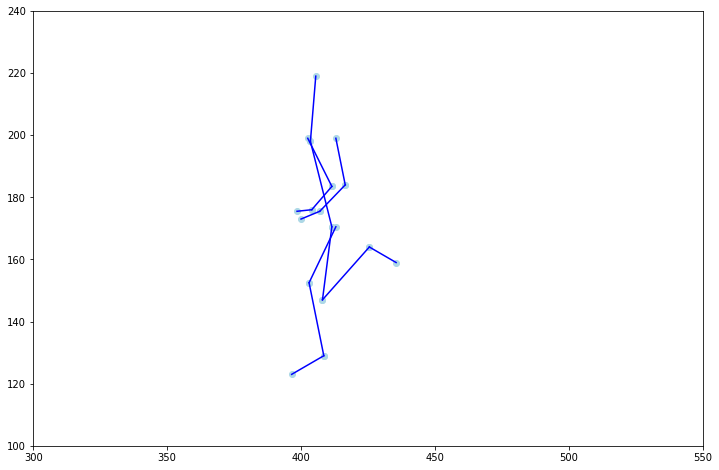

In [11]:
fig , ax = plt.subplots(figsize=(12 ,8))
x0,y0 = zip(*z_neck)
x1,y1 = zip(*z_upperArm_r)
x2,y2 = zip(*z_upperArm_l)
x3,y3 = zip(*z_formerArm_r)
x4,y4 = zip(*z_formerArm_l)
x5,y5 = zip(*z_torso)
x6,y6 = zip(*z_upperLeg_r)
x7,y7 = zip(*z_upperLeg_l)
x8,y8 = zip(*z_lowerLeg_r)
x9,y9 = zip(*z_lowerLeg_l)
x10,y10 = zip(*z_hands_r)
x11,y11 = zip(*z_hands_l)
x12,y12 = zip(*z_foot_r)
x13,y13 = zip(*z_foot_l)


ax.scatter(x0,y0 ,color='lightblue')
ax.scatter(x1,y1 ,color='lightblue')
ax.scatter(x2,y2 ,color='lightblue')
ax.scatter(x3,y3 ,color='lightblue')
ax.scatter(x4,y4 ,color='lightblue')
ax.scatter(x5,y5 ,color='lightblue')
ax.scatter(x6,y6 ,color='lightblue')
ax.scatter(x7,y7 ,color='lightblue')
ax.scatter(x8,y8 ,color='lightblue')
ax.scatter(x9,y9 ,color='lightblue')
ax.scatter(x10,y10 ,color='lightblue')
ax.scatter(x11,y11 ,color='lightblue')
ax.scatter(x12,y12 ,color='lightblue')
ax.scatter(x13,y13 ,color='lightblue')


ax.plot(x0,y0 , label='neck' , color='blue')
ax.plot(x1,y1 , label='upperArm_r' , color='blue')
ax.plot(x2,y2 , label='upperArm_l' , color='blue')
ax.plot(x3,y3 , label='formerArm_r', color='blue')
ax.plot(x4,y4 , label='fomerArm_l' , color='blue')
ax.plot(x5,y5 , label='torso' , color='blue')
ax.plot(x6,y6 , label='upperLeg_r' , color='blue')
ax.plot(x7,y7 , label='upperLeg_l' , color='blue')
ax.plot(x8,y8 , label='lowerLeg_r' , color='blue')
ax.plot(x9,y9 , label='lowerLeg_l' , color='blue')
ax.plot(x10,y10, label='hands_r' , color='blue')
ax.plot(x11,y11 , label='hands_l' , color='blue')
ax.plot(x12,y12 , label='foot_r' , color='blue')
ax.plot(x13,y13 , label='foot_r' , color='blue')

ax.set_xlim(300,550)
ax.set_ylim(100,240)

plt.show()


# 複数時間で定義


In [12]:
daitensi_l = np.array( [ data['左大転子:X'] , data['左大転子:Y'] ] )
daitensi_r = np.array( [ data['右大転子:X'] , data['右大転子:Y'] ] )
knee_r = np.array( [ data['右膝:X'] , data['右膝:Y'] ] )
knee_l = np.array( [ data['左膝:X'] , data['左膝:Y'] ] )
heel_r = np.array( [ data['右踵:X'] , data['右踵:Y'] ] )
heel_l = np.array( [ data['左踵:X'] , data['左踵:Y'] ] )
toe_r = np.array( [ data['右爪先:X'] , data['右爪先:Y'] ] )
toe_l = np.array( [ data['左爪先:X'] , data['左爪先:Y'] ] )
shoulder_r = np.array( [ data['右肩:X'] , data['右肩:Y'] ] )
shoulder_l = np.array( [ data['左肩:X'] , data['左肩:Y'] ] )
elbow_r = np.array( [ data['右肘:X'] , data['右肘:Y'] ] )
elbow_l = np.array( [ data['左肘:X'] , data['左肘:Y'] ] )
wrist_r = np.array( [ data['右手首:X'] , data['右手首:Y'] ] )
wrist_l = np.array( [ data['左手首:X'] , data['左手首:Y'] ] )
hand_r = np.array( [ data['右手先:X'] , data['右手先:Y'] ] )
hand_l = np.array( [ data['左手先:X'] , data['左手先:Y'] ] )
chest = np.array( [ data['胸骨:X'] , data['胸骨:Y'] ] )
body = np.array( [ data['胴部:X'] , data['胴部:Y'] ] )
head = np.array( [ data['頭部:X'] , data['頭部:Y'] ] )

In [13]:
neck = np.array([head , chest]).T
upperArm_r = np.array([shoulder_r , elbow_r]).T
upperArm_l = np.array([shoulder_l , elbow_l]).T
formerArm_r = np.array([elbow_r , wrist_r]).T
formerArm_l = np.array([elbow_l , wrist_l]).T
torso = np.array([chest , daitensi_r]).T
upperLeg_r = np.array([daitensi_r, knee_r]).T
upperLeg_l = np.array([daitensi_l , knee_l]).T
lowerLeg_r = np.array([knee_r, heel_r]).T
lowerLeg_l = np.array([knee_l, heel_l]).T
hands_r = np.array([wrist_r , hand_r]).T
hands_l = np.array([wrist_l , hand_l]).T
foot_r = np.array([heel_r , toe_r]).T
foot_l = np.array([heel_l , toe_l]).T

# アニメーションを作ってみる
各セグメントをプロット->animation

In [15]:
fig = plt.figure(figsize=(10,6))
ims = []

plt.title('RunningDigitize')
for uAr , fAr, uAl, fAl, t, uLr, lLr, uLl, lLl, hr, hl, fr, fl, n in zip(upperArm_r , formerArm_r , upperArm_l , formerArm_l , torso , upperLeg_r, lowerLeg_r, upperLeg_l, lowerLeg_l, hands_r, hands_l , foot_r, foot_l, neck):
    im1 = plt.plot(uAr[0],uAr[1],c='r') #右上腕
    im2 = plt.plot(fAr[0],fAr[1],c='r') #右前腕　
    im3 = plt.plot(uAl[0],uAl[1],c='r') #左上腕
    im4 = plt.plot(fAl[0],fAl[1],c='r') #左前腕
    im5 = plt.plot(t[0] , t[1] , c='r') #胴部
    im6 = plt.plot(uLr[0],uLr[1],c='r') #右大腿
    im7 = plt.plot(lLr[0],lLr[1] , c='r') #右下腿
    im8 = plt.plot(uLl[0],uLl[1] , c='r') #左大腿
    im9 = plt.plot(lLl[0],lLl[1], c='r') #左下腿
    im10 = plt.plot(hr[0],hr[1] , c='r') #右手
    im11 = plt.plot(hl[0],hl[1] , c='r') # 左手
    im12 = plt.plot(fr[0],fr[1], c='r') # 右足
    im13 = plt.plot(fl[0],fl[1], c='r') # 左足
    im14 = plt.plot(n[0],n[1], c='r') #首

    ims.append(im1 + im2 + im3 + im4 + im5 + im6 + im7 + im8 + im9 + im10 + im11 + im12 + im13 + im14)
    
ani = animation.ArtistAnimation(fig,ims,interval=50)
HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.


# 関節角度を求める

## とりあえず膝関節角度でやってみる　

In [16]:
vec_femur_r = (daitensi_r - knee_r).T #ベクトル右大腿(の二次元配列)
vec_crus_r = (heel_r - knee_r).T #ベクトル右下腿(の二次元配列)

In [17]:
right_knee_deg = []

for v1 , v2 in zip(vec_femur_r , vec_crus_r):
    i = np.inner(v1 , v2)
    n = np.linalg.norm(v1) * np.linalg.norm(v2)
    
    cos = i / n
    right_knee_deg.append(np.rad2deg(np.arccos(cos)))

In [18]:
# ただの検算
np.sqrt(np.square(data['右大転子:X'] - data['右膝:X']) + np.square(data['右大転子:Y'] - data['右膝:Y']))

0      23.759209
1      23.584953
2      22.699119
3      21.377558
4      21.828880
         ...    
285    23.478714
286    23.307724
287    23.584953
288    23.505319
289    22.388613
Length: 290, dtype: float64

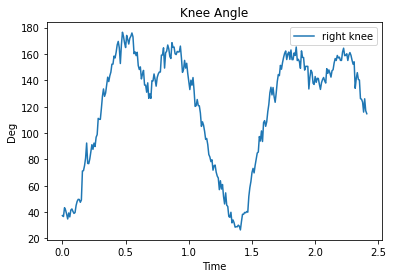

In [20]:
plt.plot(data['time'],right_knee_deg, label='right knee')

plt.title('Knee Angle')

plt.xlabel('Time')
plt.ylabel('Deg')

plt.legend()

## 関節角度を求める関数を定義
汎用性をもたせる
- vec1 -> ndarray [[x,y]]
- vec2 -> ndarray [[x,y]]

転置済み、時系列順のベクトル２次元配列であることに注意

In [21]:
def tan(vec1 , vec2):
    deg = []
    for v1 , v2 in zip(vec1,vec2):
        i = np.inner(v1 , v2)
        n = np.linalg.norm(v1) * np.linalg.norm(v2)
        cos = i / n
        
        deg.append(np.rad2deg(np.arccos(cos)))
    return deg

### いろいろな関節角度を計算してみよう

In [23]:
# 右膝
right_knee_angle = tan(vec_femur_r , vec_crus_r)

# 左膝
vec_femur_l = (daitensi_l - knee_l).T
vec_crus_l = (heel_l - knee_l).T

left_knee_angle = tan(vec_femur_l , vec_crus_l)

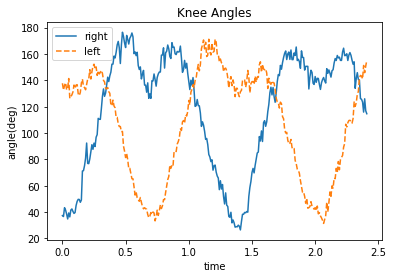

In [24]:
plt.plot(data['time'], right_knee_angle , label='right')
plt.plot(data['time'], left_knee_angle , label='left' , linestyle='--')

plt.title('Knee Angles')
plt.xlabel('time')
plt.ylabel('angle(deg)')
plt.legend()

plt.show()

In [25]:
# 右足関節
vec_crus_r1 = (knee_r - heel_r).T
vec_foot_r = (toe_r - heel_r).T

right_foot_angle = tan(vec_crus_r1 , vec_foot_r)

# 左足関節
vec_crus_l1 = (knee_l - heel_l).T
vec_foot_l = (toe_l - heel_l).T

left_foot_angle = tan(vec_crus_l1 , vec_foot_l)

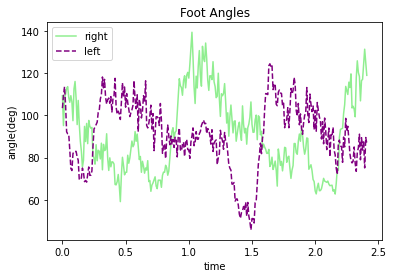

In [26]:
plt.plot(data['time'], right_foot_angle , label='right' ,linestyle='-' , color='lightgreen')
plt.plot(data['time'], left_foot_angle , label='left' , linestyle='--' , color='purple')

plt.title('Foot Angles')
plt.xlabel('time')
plt.ylabel('angle(deg)')
plt.legend()

plt.show()

In [27]:
# 右肘
vec_upperArm_r = (shoulder_r - elbow_r).T
vec_formerArm_r = (wrist_r - elbow_r).T

right_elbow_angle = tan(vec_upperArm_r , vec_formerArm_r)

#　左肘
vec_upperArm_l = (shoulder_l - elbow_l).T
vec_formerArm_l = (wrist_l - elbow_l).T

left_elbow_angle = tan(vec_upperArm_l , vec_formerArm_l)

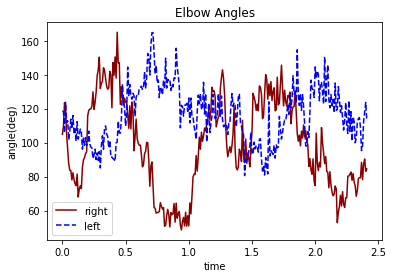

In [28]:
plt.plot(data['time'], right_elbow_angle , label='right' ,linestyle='-' , color='darkred')
plt.plot(data['time'], left_elbow_angle , label='left' , linestyle='--' , color='blue')

plt.title('Elbow Angles')
plt.xlabel('time')
plt.ylabel('angle(deg)')
plt.legend()

plt.show()

# 部分質量比から身体重心を求める
1. 質量中心比(CMR)から各セグメントの身体部分重心(COM)を算出する
2. 身体部分重心比から身体重心（COG)を算出する

### 用語の説明
* 質量中心比(CMR) = Center of Mass Ratio
* 身体部分重心(COM) = Center Of Mass
* 身体部分重心比(PMR) = Partial Mass Ratio
* 身体重心 (COG) = Center Of Gravity


## 身体部分重心の求め方
- 身体部分重心(COM)= 中枢端 * (1-質量中心比) + 末梢端 * 質量中心比

In [29]:
#身体質量中心比(CMR)を定義
head_cmr = 0.891 #頭部
body_cmr = 0.493 # 胴体
upperArm_cmr = 0.529 #上腕
formerArm_cmr = 0.415 #前腕
upperLeg_cmr = 0.475 #大腿
lowerLeg_cmr = 0.406 #下腿
hand_cmr = 0.891 #手
foot_cmr = 0.595 #足

In [30]:
#身体部分重心比(PMR)を定義
head_pmr = 0.075
body_pmr = 0.457
upperArm_pmr = 0.026
formerArm_pmr = 0.015
upperLeg_pmr = 0.123
lowerLeg_pmr = 0.053
hand_pmr = 0.006
foot_pmr = 0.011

In [31]:
df = data #新たなDataframeを定義

In [32]:
# 足
com_foot_r = toe_r * (1-foot_cmr) + heel_r * foot_cmr
com_foot_l = toe_l * (1-foot_cmr) + heel_l * foot_cmr 

# 下腿
com_lowerLeg_r = knee_r * (1-lowerLeg_cmr) + heel_r * lowerLeg_cmr
com_lowerLeg_l = knee_l * (1-lowerLeg_cmr) + heel_l * lowerLeg_cmr

# 大腿
com_upperLeg_r = daitensi_r * (1-upperLeg_cmr) + knee_r * upperLeg_cmr
com_upperLeg_l = daitensi_l * (1-upperLeg_cmr) + knee_l * upperLeg_cmr

# 上腕
com_upperArm_r = shoulder_r * (1-upperArm_cmr) + elbow_r * upperArm_cmr
com_upperArm_l = shoulder_l * (1-upperArm_cmr) + elbow_l * upperArm_cmr

# 前腕
com_formerArm_r = elbow_r * (1-formerArm_cmr) + wrist_r * formerArm_cmr
com_formerArm_l = elbow_l * (1-formerArm_cmr) + wrist_l * formerArm_cmr

# 手
com_hand_r = wrist_r * (1-hand_cmr) + hand_r * hand_cmr
com_hand_l = wrist_l * (1-hand_cmr) + hand_l * hand_cmr

# 頭
com_head = chest * (1-head_cmr) + head * head_cmr

# 胴体はなんかそのままあった。
com_body = body

## 身体重心(COG)を計算
**COGの計算方法**
- (Σ部分質量比(PMR) * 身体部分重心(COM)座標) / Σ部分質量比(PMR)

In [33]:
#部分質量比の合計 を計算(２部位あるものは２倍)
pmr_sum = head_pmr + body_pmr + 2*upperArm_pmr + 2*formerArm_pmr + 2*upperLeg_pmr + 2*lowerLeg_pmr + 2*hand_pmr + 2*foot_pmr

# Mass ratioを計算
mr = com_foot_r * foot_pmr +\
      com_foot_l * foot_pmr +\
      com_lowerLeg_r * lowerLeg_pmr +\
      com_lowerLeg_l * lowerLeg_pmr +\
      com_upperLeg_r * upperLeg_pmr +\
      com_upperLeg_l * upperLeg_pmr +\
      com_upperArm_r * upperArm_pmr +\
      com_upperArm_l * upperArm_pmr +\
      com_formerArm_r * formerArm_pmr +\
      com_formerArm_l * formerArm_pmr +\
      com_hand_r * hand_pmr +\
      com_hand_l * hand_pmr +\
      com_head * head_pmr +\
      com_body * body_pmr

# COG を計算
cog = mr / pmr_sum
COG = cog.T #時系列順に[x,y]となるように転置

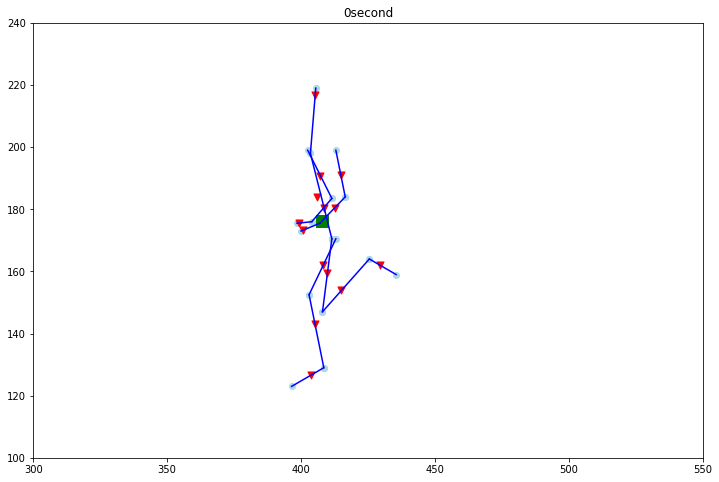

In [34]:
fig , ax = plt.subplots(figsize=(12 ,8))
x0,y0 = zip(*z_neck)
x1,y1 = zip(*z_upperArm_r)
x2,y2 = zip(*z_upperArm_l)
x3,y3 = zip(*z_formerArm_r)
x4,y4 = zip(*z_formerArm_l)
x5,y5 = zip(*z_torso)
x6,y6 = zip(*z_upperLeg_r)
x7,y7 = zip(*z_upperLeg_l)
x8,y8 = zip(*z_lowerLeg_r)
x9,y9 = zip(*z_lowerLeg_l)
x10,y10 = zip(*z_hands_r)
x11,y11 = zip(*z_hands_l)
x12,y12 = zip(*z_foot_r)
x13,y13 = zip(*z_foot_l)


ax.scatter(x0,y0 ,color='lightblue')
ax.scatter(x1,y1 ,color='lightblue')
ax.scatter(x2,y2 ,color='lightblue')
ax.scatter(x3,y3 ,color='lightblue')
ax.scatter(x4,y4 ,color='lightblue')
ax.scatter(x5,y5 ,color='lightblue')
ax.scatter(x6,y6 ,color='lightblue')
ax.scatter(x7,y7 ,color='lightblue')
ax.scatter(x8,y8 ,color='lightblue')
ax.scatter(x9,y9 ,color='lightblue')
ax.scatter(x10,y10 ,color='lightblue')
ax.scatter(x11,y11 ,color='lightblue')
ax.scatter(x12,y12 ,color='lightblue')
ax.scatter(x13,y13 ,color='lightblue')


ax.plot(x0,y0 , label='neck' , color='blue')
ax.plot(x1,y1 , label='upperArm_r' , color='blue')
ax.plot(x2,y2 , label='upperArm_l' , color='blue')
ax.plot(x3,y3 , label='formerArm_r', color='blue')
ax.plot(x4,y4 , label='fomerArm_l' , color='blue')
ax.plot(x5,y5 , label='torso' , color='blue')
ax.plot(x6,y6 , label='upperLeg_r' , color='blue')
ax.plot(x7,y7 , label='upperLeg_l' , color='blue')
ax.plot(x8,y8 , label='lowerLeg_r' , color='blue')
ax.plot(x9,y9 , label='lowerLeg_l' , color='blue')
ax.plot(x10,y10, label='hands_r' , color='blue')
ax.plot(x11,y11 , label='hands_l' , color='blue')
ax.plot(x12,y12 , label='foot_r' , color='blue')
ax.plot(x13,y13 , label='foot_r' , color='blue')

#部分重心も描画
ax.scatter(com_upperLeg_r.T[0][0], com_upperLeg_r.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_lowerLeg_r.T[0][0], com_lowerLeg_r.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_upperLeg_l.T[0][0], com_upperLeg_l.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_lowerLeg_l.T[0][0], com_lowerLeg_l.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_upperArm_r.T[0][0], com_upperArm_r.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_formerArm_r.T[0][0], com_formerArm_r.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_upperArm_l.T[0][0], com_upperArm_l.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_formerArm_l.T[0][0], com_formerArm_l.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_hand_r.T[0][0], com_hand_r.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_hand_l.T[0][0], com_hand_l.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_foot_l.T[0][0], com_foot_l.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_foot_r.T[0][0], com_foot_r.T[0][1], color='red' , marker='v', s=50)
ax.scatter(com_head.T[0][0], com_head.T[0][1], color='red' , marker='v', s=50)
ax.scatter(body.T[0][0] , body.T[0][1] , color='red', marker='v' ,s=50)

# COG
ax.scatter(COG[0][0], COG[0][1] , color='green' , marker='s' , s=150 , label='cog')

ax.set_xlim(300,550)
ax.set_ylim(100,240)

plt.title('0second')
plt.show()

# 身体重心も含めてアニメーション


In [35]:
fig = plt.figure(figsize=(10,6))
ims = []

plt.title('RunningDigitize')
for uAr , fAr, uAl, fAl, t, uLr, lLr, uLl, lLl, hr, hl, fr, fl, n , cog in zip(upperArm_r , formerArm_r , upperArm_l , formerArm_l , torso , upperLeg_r, lowerLeg_r, upperLeg_l, lowerLeg_l, hands_r, hands_l , foot_r, foot_l, neck, COG):
    im1 = plt.plot(uAr[0],uAr[1],c='r') #右上腕
    im2 = plt.plot(fAr[0],fAr[1],c='r') #右前腕　
    im3 = plt.plot(uAl[0],uAl[1],c='r') #左上腕
    im4 = plt.plot(fAl[0],fAl[1],c='r') #左前腕
    im5 = plt.plot(t[0] , t[1] , c='r') #胴部
    im6 = plt.plot(uLr[0],uLr[1],c='r') #右大腿
    im7 = plt.plot(lLr[0],lLr[1] , c='r') #右下腿
    im8 = plt.plot(uLl[0],uLl[1] , c='r') #左大腿
    im9 = plt.plot(lLl[0],lLl[1], c='r') #右下腿
    im10 = plt.plot(hr[0],hr[1] , c='r') #右手
    im11 = plt.plot(hl[0],hl[1] , c='r') # 左手
    im12 = plt.plot(fr[0],fr[1], c='r') # 右足
    im13 = plt.plot(fl[0],fl[1], c='r') # 左足
    im14 = plt.plot(n[0],n[1], c='r') #首
    cog =  plt.scatter(cog[0], cog[1] , color='green' , marker='s' , s=150 , label='cog')
    
    ims.append(im1 + im2 + im3 + im4 + im5 + im6 + im7 + im8 + im9 + im10 + im11 + im12 + im13 + im14 + [cog])
    
ani = animation.ArtistAnimation(fig,ims,interval=50)
HTML(ani.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.